In [3]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
# from google.colab import drive
# drive.mount('/content/drive')

In [52]:
# !kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

In [53]:
# !unzip \*.zip

In [4]:
for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 1 directories and 0 images in '/content/drive/MyDrive/dataset'.
there are 3 directories and 0 images in '/content/drive/MyDrive/dataset/COVID_IEEE'.
there are 0 directories and 619 images in '/content/drive/MyDrive/dataset/COVID_IEEE/virus'.
there are 0 directories and 668 images in '/content/drive/MyDrive/dataset/COVID_IEEE/normal'.
there are 0 directories and 536 images in '/content/drive/MyDrive/dataset/COVID_IEEE/covid'.


In [5]:
data_dir = pathlib.Path("/content/drive/MyDrive/dataset/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [6]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['person1290_virus_2215.jpeg']
image shape (1264, 1392)


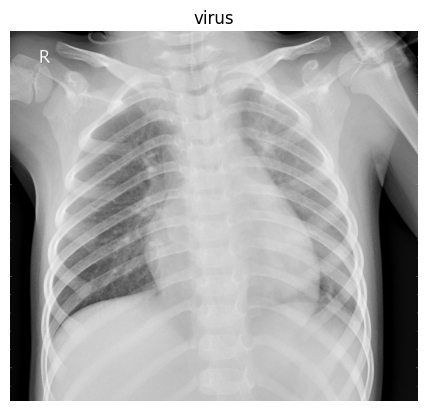

In [7]:
img = view_image("/content/drive/MyDrive/dataset/COVID_IEEE/","virus")

['IM-0517-0001-0001.jpeg']
image shape (1654, 2102)


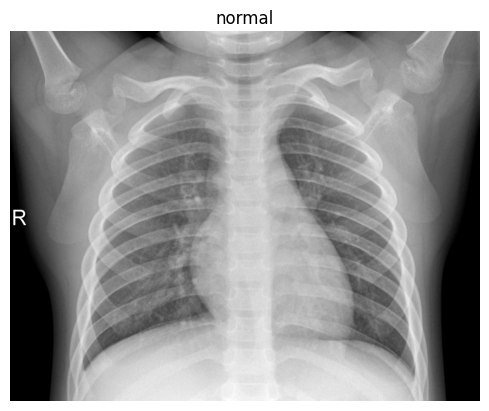

In [8]:
img = view_image("/content/drive/MyDrive/dataset/COVID_IEEE/","normal")

['CASE26_XRAY_1.jpg']
image shape (1482, 1989, 3)


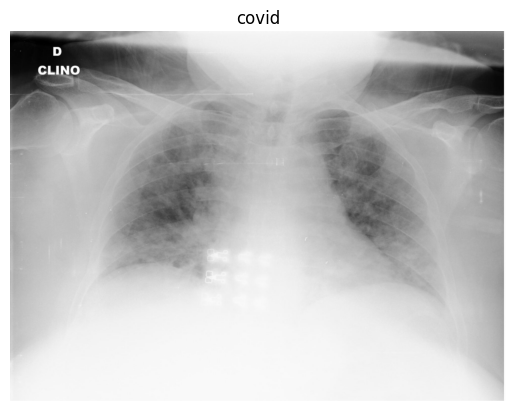

In [9]:
img = view_image("/content/drive/MyDrive/dataset/COVID_IEEE/","covid")

In [10]:
data=[]
labels=[]
covid=os.listdir("/content/drive/MyDrive/dataset/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/drive/MyDrive/dataset/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [11]:
normal=os.listdir("/content/drive/MyDrive/dataset/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/drive/MyDrive/dataset/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [12]:
virus=os.listdir("/content/drive/MyDrive/dataset/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/drive/MyDrive/dataset/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [13]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [15]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [17]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 470s 15s/step - loss: 0.8882 - accuracy: 0.5765 - val_loss: 0.6733 - val_accuracy: 0.7603
Epoch 2/15
32/32 [==============================] - 464s 15s/step - loss: 0.5359 - accuracy: 0.8020 - val_loss: 0.4303 - val_accuracy: 0.8356
Epoch 3/15
32/32 [==============================] - 461s 15s/step - loss: 0.3296 - accuracy: 0.8765 - val_loss: 0.4696 - val_accuracy: 0.8425
Epoch 4/15
32/32 [==============================] - 468s 15s/step - loss: 0.2241 - accuracy: 0.9216 - val_loss: 0.2362 - val_accuracy: 0.9269
Epoch 5/15
32/32 [==============================] - 464s 15s/step - loss: 0.1823 - accuracy: 0.9333 - val_loss: 0.2491 - val_accuracy: 0.9087
Epoch 6/15
32/32 [==============================] - 463s 15s/step - loss: 0.1608 - accuracy: 0.9441 - val_loss: 0.2132 - val_accuracy: 0.9224
Epoch 7/15
32/32 [==============================] - 460s 14s/step - loss: 0.0967 - accuracy: 0.9618 - val_loss: 0.2035 - val_accuracy: 0.9406
Epoch 

Text(0.5, 1.0, 'Training-Validation Accuracy')

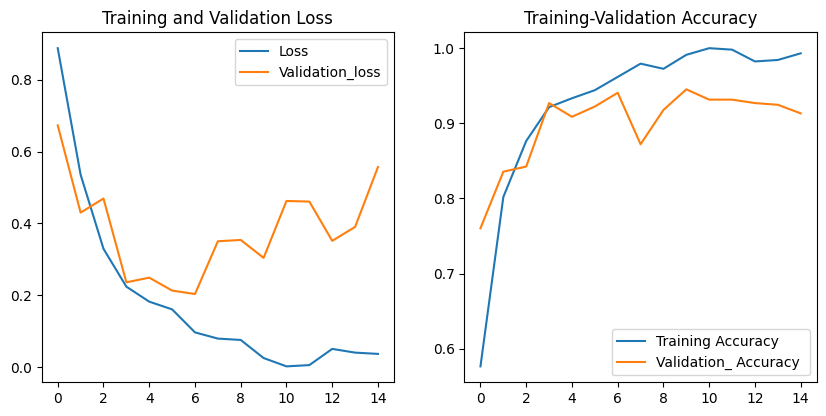

In [18]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [19]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 44s 3s/step


In [20]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       108
           1       0.89      0.96      0.93       129
           2       0.98      0.86      0.92       128

    accuracy                           0.93       365
   macro avg       0.93      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365



In [21]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,106,2,0
normal,3,124,2
virus,5,13,110


In [22]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

In [23]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [24]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [27]:
model.fit(X_train, y_train, validation_split=0.3, epochs=7, batch_size=32)

Epoch 1/7
32/32 [==============================] - 101s 3s/step - loss: 1.5085 - accuracy: 0.8755 - val_loss: 0.8817 - val_accuracy: 0.9315
Epoch 2/7
32/32 [==============================] - 101s 3s/step - loss: 0.3115 - accuracy: 0.9657 - val_loss: 0.3082 - val_accuracy: 0.9635
Epoch 3/7
32/32 [==============================] - 101s 3s/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 0.3077 - val_accuracy: 0.9612
Epoch 4/7
32/32 [==============================] - 121s 4s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3003 - val_accuracy: 0.9566
Epoch 5/7
32/32 [==============================] - 99s 3s/step - loss: 7.7735e-04 - accuracy: 1.0000 - val_loss: 0.2771 - val_accuracy: 0.9612
Epoch 6/7
32/32 [==============================] - 126s 4s/step - loss: 1.9298e-04 - accuracy: 1.0000 - val_loss: 0.2757 - val_accuracy: 0.9635
Epoch 7/7
32/32 [==============================] - 119s 4s/step - loss: 1.6190e-04 - accuracy: 1.0000 - val_loss: 0.2795 - val_accuracy: 0.9635


Text(0.5, 1.0, 'Training-Validation Accuracy')

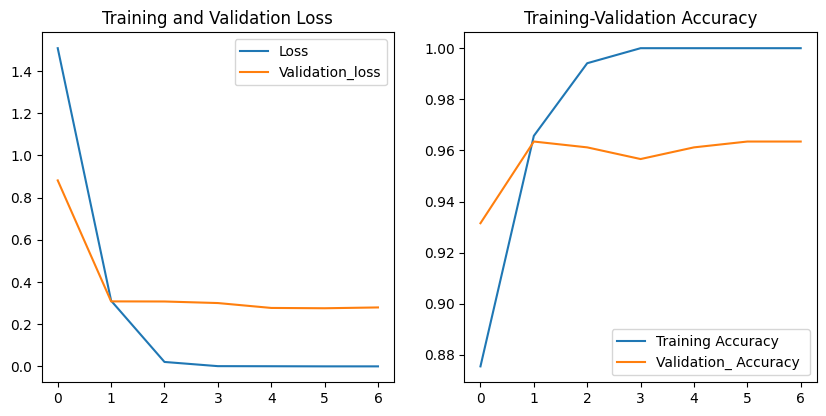

In [28]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [29]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 17s 1s/step


In [30]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.94      0.98      0.96       129
           2       0.98      0.95      0.96       128

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [31]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,106,2,0
normal,0,126,3
virus,1,6,121
